# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [173]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [174]:
# Import passengers.csv and set it as a time-series object. Plot the TS

df = pd.read_csv('passengers.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month          144 non-null object
#Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [175]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [176]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')
df.set_index('Month', inplace=True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


Text(0, 0.5, 'Number of Passengers')

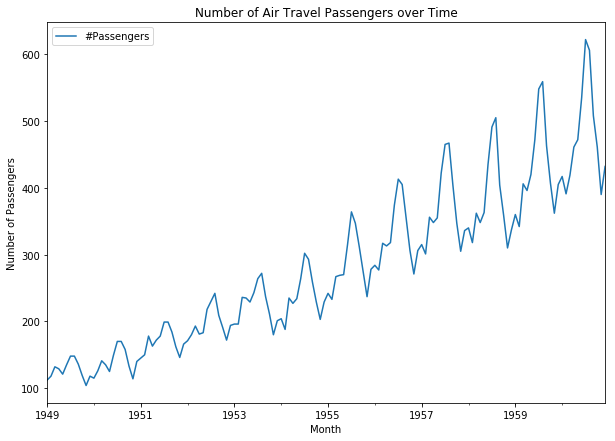

In [178]:
df.plot(figsize=(10,7))
plt.title('Number of Air Travel Passengers over Time')
plt.ylabel('Number of Passengers')

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [179]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationarity_check(ts):
    
    # hecking rolling stats
    
    roll_mean = ts.rolling(window=12, center=False).mean()
    roll_std = ts.rolling(window=12, center=False).std()
    
    plt.figure(figsize=(10,7))
    plt.plot(ts, label='Original')
    plt.plot(roll_mean, label='Rolling Mean')
    plt.plot(roll_std, label='Rolling Standard Deviation')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation for Air Passenger Data')
    plt.show()
    
    
    # Perform dickey-fuller test
    
    dftest = adfuller(ts.iloc[:,0])
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    return dfoutput

Use your newly created function on the airpassenger data set.

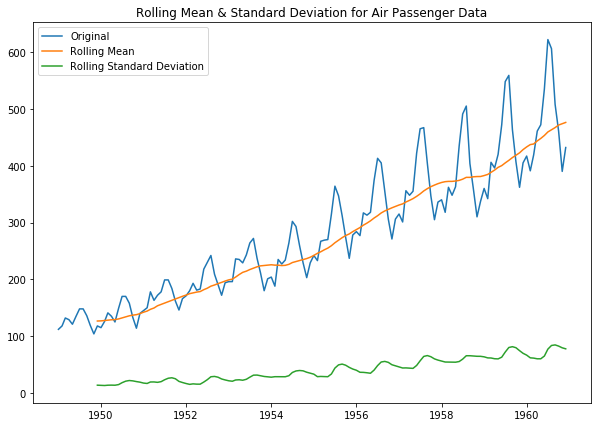

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [180]:
# Code here
stationarity_check(df)

## Perform a log() and sqrt() transform

In [181]:
# Log transform timeseries and compare with original to check the effect

df_log = df.copy()
df_log['#Passengers'] = np.log(df_log['#Passengers'])

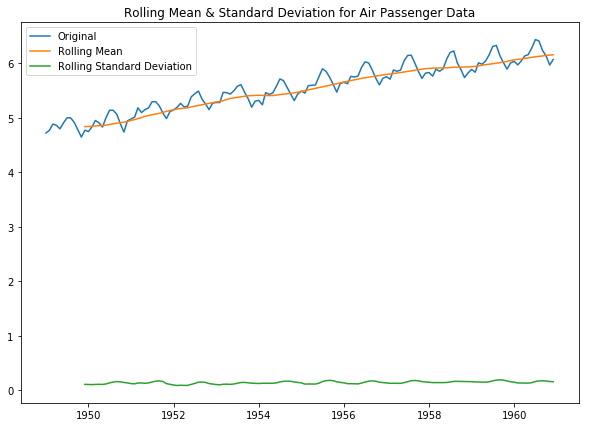

Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [182]:
stationarity_check(df_log)

In [183]:
# Sqrt transformation

df_sqrt = df.copy()
df_sqrt['#Passengers'] = np.sqrt(df_log['#Passengers'])

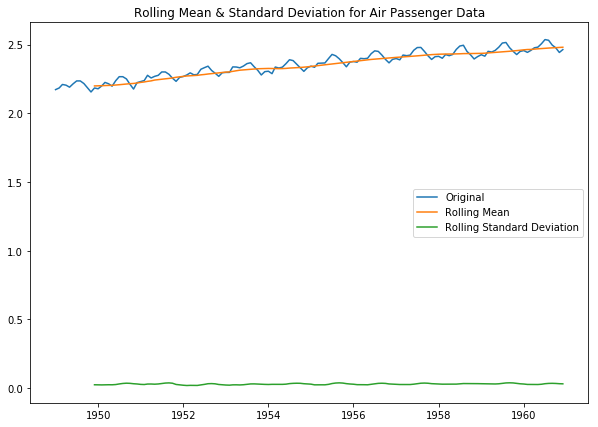

Test Statistic                  -1.942528
p-value                          0.312326
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [184]:
stationarity_check(df_sqrt)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

In [185]:
# your code here
rolling_mean = df_log.rolling(window=7).mean()


Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [186]:
# Subtract the moving average from the original data and check head for Nans
df_rolling_mean = df_log.copy()
df_rolling_mean['#Passengers'] = df_rolling_mean['#Passengers'] - rolling_mean['#Passengers']

In [187]:
df_rolling_mean.head(10)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [188]:
# Drop the NaN values from timeseries calculated above
df_rolling_mean.dropna(inplace=True)

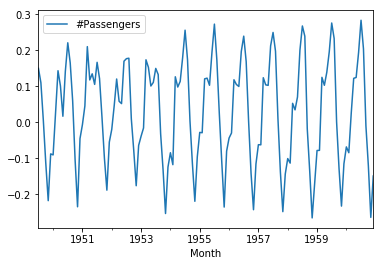

In [189]:
# Plot the result
df_rolling_mean.plot()


Finally, use your function `check_stationarity` to see if this series is considered stationary!

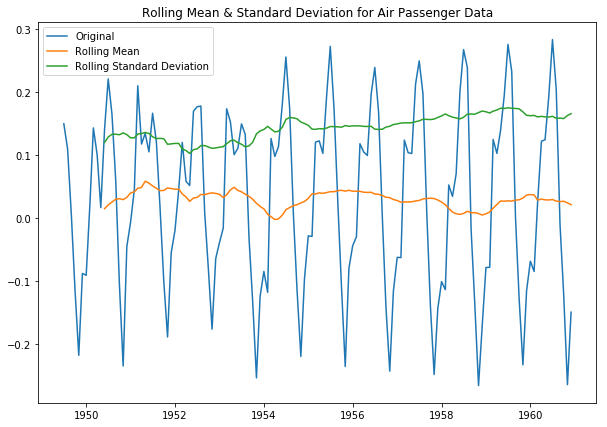

Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64

In [190]:
# Your code here
stationarity_check(df_rolling_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [191]:
# Your conclusion here
# Looks fairly stationary
# However, p-value is still 0.15, so null hypothesis cannot be rejected

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

In [192]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
weighted_mean = df_log.ewm(halflife=4).mean()

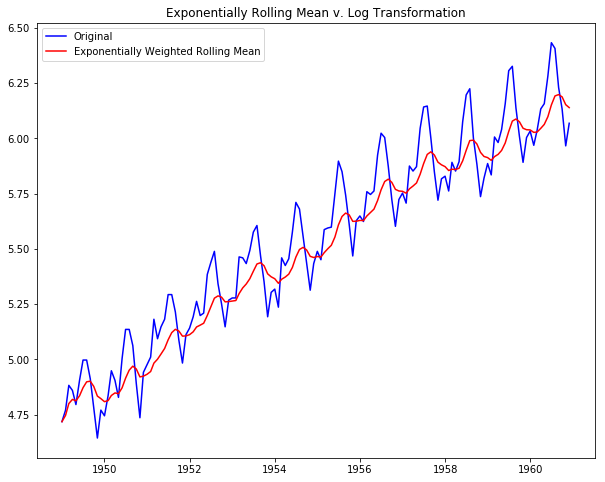

In [193]:
df_weighted_mean = df_log.copy()


# Plot the original data with exp weighted average

plt.figure(figsize=(10,8))
plt.plot(df_log, color='blue', label='Original')
plt.plot(weighted_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.title('Exponentially Rolling Mean v. Log Transformation')
plt.legend()


In [194]:
# Subtract the moving average from the original data and plot
df_weighted_mean['#Passengers'] = df_weighted_mean['#Passengers'] - weighted_mean['#Passengers']
df_weighted_mean.dropna(inplace=True)

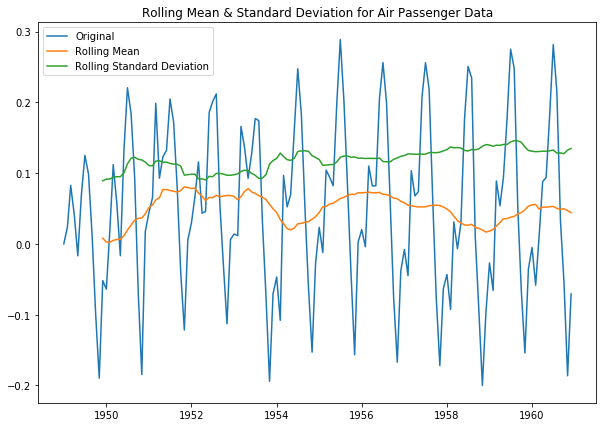

Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [195]:
# do a stationarity check

stationarity_check(df_weighted_mean)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


In [196]:
# Your conclusion here
# Better to use weighted mean
# p value less than 5%.  Therefore reject null hypothesis that data is not stationary

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [197]:
# difference your data and look at the head
df_differenced = df_weighted_mean.diff(periods=12)

In [198]:
df_differenced.head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN


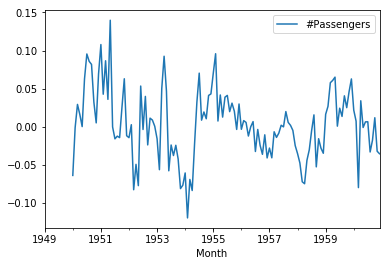

In [199]:
# plot your differenced time series
df_differenced.plot()

In [200]:
# drop nas
df_differenced.dropna(inplace=True)

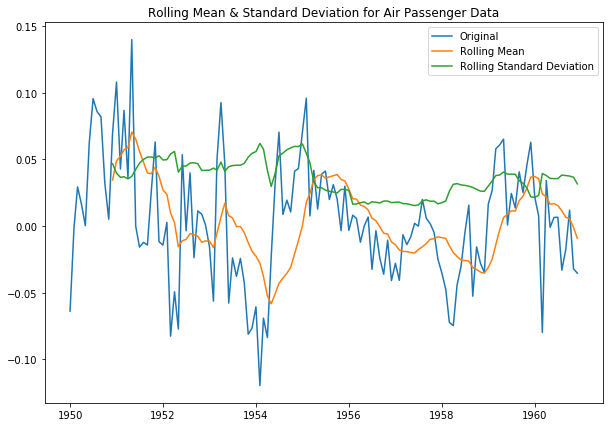

Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

In [201]:
# perform the stationarity check
stationarity_check(df_differenced)

### Your conclusion

In [ ]:
# Your conclusion here
# Still some fluctuations, but dickey-fuller test suggests that it is OK

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.